In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

2023-05-02 00:31:14.634470: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
vueltas = pd.read_csv("../dataset_todos_pilotos/vueltas_spain_final.csv")

vueltas.drop(['Piloto'], axis = 1, inplace = True)

In [3]:
vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

In [4]:
vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_test = vueltas_test.drop(['anyo'], axis=1)

In [5]:
vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [6]:
vueltas_test.shape

(1074, 20)

In [7]:
scaler = MinMaxScaler()
scaler.fit(vueltas_train)
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)


In [8]:
vueltas_test

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
4077,87.509,2.0,5.0,0.0,1.0,1.0,0.0,36.7,0.0,7.0,49.4,2.0,87.627,87.831,2.0,13.0,0.0,0.0,1.0,0.0
4078,87.574,3.0,6.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.4,2.0,87.198,87.009,2.0,13.0,0.0,0.0,1.0,0.0
4079,87.601,4.0,7.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.5,2.0,87.671,88.177,2.0,13.0,0.0,0.0,1.0,0.0
4080,87.937,5.0,8.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.3,2.0,87.891,88.503,2.0,13.0,0.0,0.0,1.0,0.0
4081,87.761,6.0,9.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.5,2.0,87.427,88.655,2.0,13.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,87.021,23.0,2.0,1.0,1.0,2.0,0.0,37.1,0.0,6.0,49.5,1.0,90.757,88.555,1.0,27.0,0.0,1.0,0.0,0.0
5147,87.196,24.0,3.0,1.0,1.0,2.0,0.0,37.1,0.0,6.0,49.4,1.0,90.558,89.588,1.0,27.0,0.0,1.0,0.0,0.0
5148,87.003,25.0,4.0,1.0,1.0,2.0,0.0,37.0,0.0,6.0,49.4,1.0,92.489,88.079,1.0,27.0,0.0,1.0,0.0,0.0
5149,87.279,26.0,5.0,1.0,1.0,2.0,0.0,37.0,0.0,6.0,49.4,1.0,108.293,88.687,1.0,27.0,0.0,1.0,0.0,0.0


In [9]:
df = pd.DataFrame(vueltas_test_scaler)

In [10]:
df[:66]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.136404,0.000000,0.088889,0.0,0.0,0.0,0.0,1.397351,0.0,-3.007407,1.009804,0.055556,0.108344,0.110651,0.10,0.116667,0.0,0.0,1.0,0.0
1,0.137341,0.015873,0.111111,0.0,0.0,0.0,0.0,1.410596,0.0,-3.081481,1.009804,0.055556,0.103493,0.101356,0.10,0.116667,0.0,0.0,1.0,0.0
2,0.137730,0.031746,0.133333,0.0,0.0,0.0,0.0,1.417219,0.0,-3.081481,1.014706,0.055556,0.108842,0.114564,0.10,0.116667,0.0,0.0,1.0,0.0
3,0.142573,0.047619,0.155556,0.0,0.0,0.0,0.0,1.417219,0.0,-3.081481,1.004902,0.055556,0.111330,0.118250,0.10,0.116667,0.0,0.0,1.0,0.0
4,0.140036,0.063492,0.177778,0.0,0.0,0.0,0.0,1.410596,0.0,-3.081481,1.014706,0.055556,0.106083,0.119969,0.10,0.116667,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.132022,0.968254,0.400000,1.0,0.0,1.0,0.0,1.384106,0.0,-2.933333,0.941176,0.000000,0.133245,0.092411,0.10,1.000000,0.0,1.0,0.0,0.0
62,0.134040,0.984127,0.422222,1.0,0.0,1.0,0.0,1.377483,0.0,-2.933333,0.941176,0.000000,0.130576,0.087141,0.10,1.000000,0.0,1.0,0.0,0.0
63,0.137874,1.000000,0.444444,1.0,0.0,1.0,0.0,1.377483,0.0,-3.007407,0.946078,0.000000,0.124832,0.091031,0.10,1.000000,0.0,1.0,0.0,0.0
64,0.140468,0.000000,0.088889,0.0,0.0,0.0,0.0,1.397351,0.0,-3.007407,1.009804,0.166667,0.110651,0.117436,0.25,0.183333,0.0,0.0,1.0,0.0


In [11]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 10 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    trainY.append(vueltas_train_scaler[i + future - 1:i + future, 5])
    #print(vueltas_train_scaler[i + future - 1:i + future, 5])
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
    testY.append(vueltas_test_scaler[i + future - 1:i + future,5
                                    ])
    

In [12]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [13]:
trainX.shape

(4067, 10, 20)

In [14]:
trainY.shape

(4067, 1)

In [15]:
testX.shape

(1064, 10, 20)

In [16]:
testY.shape

(1064, 1)

In [17]:
model = Sequential()
model.add(GRU(trainX.shape[2],input_shape = (trainX.shape[1],trainX.shape[2]),return_sequences = True,
                    activation = 'relu'))
model.add(GRU(256,activation = 'relu',return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(128,activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(64,activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = 'mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 20)            2520      
                                                                 
 gru_1 (GRU)                 (None, 10, 256)           213504    
                                                                 
 dropout (Dropout)           (None, 10, 256)           0         
                                                                 
 gru_2 (GRU)                 (None, 10, 128)           148224    
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 gru_3 (GRU)                 (None, 10, 64)            37248     
                                                                 
 dropout_2 (Dropout)         (None, 10, 64)            0

Epoch 1/20
58/58 [==============================] - 10s 68ms/step - loss: 0.0581 - val_loss: 0.0716
Epoch 2/20
58/58 [==============================] - 3s 58ms/step - loss: 0.0372 - val_loss: 0.0598
Epoch 3/20
58/58 [==============================] - 4s 61ms/step - loss: 0.0305 - val_loss: 0.0510
Epoch 4/20
58/58 [==============================] - 4s 62ms/step - loss: 0.0259 - val_loss: 0.0474
Epoch 5/20
58/58 [==============================] - 3s 59ms/step - loss: 0.0224 - val_loss: 0.0528
Epoch 6/20
58/58 [==============================] - 3s 57ms/step - loss: 0.0223 - val_loss: 0.0379
Epoch 7/20
58/58 [==============================] - 3s 57ms/step - loss: 0.0190 - val_loss: 0.0431
Epoch 8/20
58/58 [==============================] - 3s 59ms/step - loss: 0.0171 - val_loss: 0.0305
Epoch 9/20
58/58 [==============================] - 3s 59ms/step - loss: 0.0170 - val_loss: 0.0329
Epoch 10/20
58/58 [==============================] - 3s 60ms/step - loss: 0.0161 - val_loss: 0.0370
Epoch 11

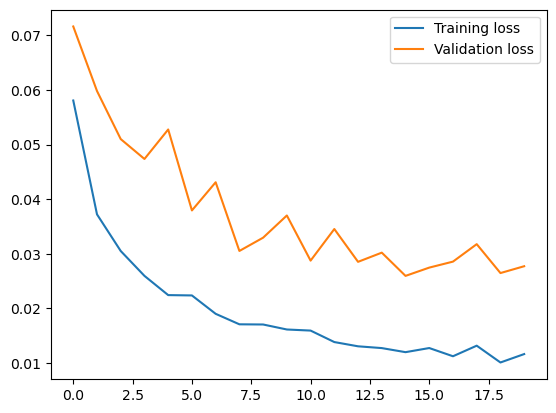

In [18]:
history = model.fit(trainX,trainY,epochs = 20,batch_size = 64,validation_split =0.1,verbose = 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [20]:
prediction = model.predict(testX[100:101]) 
prediction[0][0].item()

1/1 [==============================] - 0s 32ms/step


0.36284732818603516

In [21]:
testY[100]

array([0.66666667])

### Sacar métricas de lo que falla. Con el unique, ver a cual se acerca más. Sacar matrix_confusion, con este modelo.

### Ahora vamos a sacar todas las Y^ y todas las y.

In [22]:
y_real = testY.tolist()

In [23]:
y_pred = []
for i in range (0, len(y_real)):
    prediction = model.predict(testX[i:i+1])     
    valor = prediction[0][0].item()
    y_pred.append(valor)

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 35ms/step


In [27]:
print(len(y_real), len(y_pred))

1064 1064


In [28]:
uniques = set(tuple(x) for x in y_real)
uniques = [list(x) for x in uniques]

In [29]:
uniques

[[0.0], [1.0], [0.6666666666666667], [0.3333333333333333]]

In [30]:
y_pred_normalized = []
for val in y_pred:
    dist = [abs(val-x[0]) for x in uniques]
    closest_val = uniques[np.argmin(dist)][0]
    y_pred_normalized.append(closest_val)


In [31]:
bien_predecidas = 0
mal_predecidas = 0

for i in range (0, len(y_real)):
    if y_pred_normalized[i] == y_real[i][0]:
        bien_predecidas += 1
    else:
        mal_predecidas += 1

precision = bien_predecidas/(mal_predecidas+bien_predecidas)      

In [33]:
print("El modelo tiene una precision de: ", precision)

El modelo tiene una precision de:  0.3975563909774436


### Ahora tenemos que sacar las demás métricas y como tenemos 4 clases

### El número de stint que más veces aparece en el conjunto de test, ¿qué porcentaje sobre el total supone? 

In [34]:
frecuencias = {}

y_real_ = [sublista[0] for sublista in y_real]
frecuencias = {}
numero_mas_frecuente = None
frecuencia_maxima = 0

for numero in y_real_:
    if numero in frecuencias:
        frecuencias[numero] += 1
    else:
        frecuencias[numero] = 1

    if frecuencias[numero] > frecuencia_maxima:
        frecuencia_maxima = frecuencias[numero]
        numero_mas_frecuente = numero

print("El número que aparece con más frecuencia es:", numero_mas_frecuente)
print("Las frecuencias de cada número son:")
total = len(y_real_)

for numero, frecuencia in frecuencias.items():
    print(numero, "aparece", frecuencia, "veces que supone un", round((frecuencia/total)*100, 2), "del total")
    

El número que aparece con más frecuencia es: 0.6666666666666667
Las frecuencias de cada número son:
0.0 aparece 195 veces que supone un 18.33 del total
0.3333333333333333 aparece 329 veces que supone un 30.92 del total
0.6666666666666667 aparece 350 veces que supone un 32.89 del total
1.0 aparece 190 veces que supone un 17.86 del total


In [35]:
clases = [str(sublista[0]) for sublista in uniques]
#Tenemos las clases en tipo string
clases

['0.0', '1.0', '0.6666666666666667', '0.3333333333333333']

### Ahora tenemos la lista clases, que son nuestras 4 clases para clasificar. Asi que vamos a pasar las clases a string, y vamos a sacar FN, FP, TP, TN

In [36]:
y_real_str = [str(sublista) for sublista in y_real_]
y_pred_normalized_str = [str(sublista) for sublista in y_pred_normalized]

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
# Calcular la matriz de confusión
cm = confusion_matrix(y_real_str, y_pred_normalized_str, labels=clases)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(clases)
print(cm)

# Imprimir las métricas básicas
print("Métricas:")
print(classification_report(y_real_str, y_pred_normalized_str, labels=clases))

Matriz de confusión:
['0.0', '1.0', '0.6666666666666667', '0.3333333333333333']
[[149   0   0  46]
 [125   0   0  65]
 [189   0   0 161]
 [ 55   0   0 274]]
Métricas:
                    precision    recall  f1-score   support

               0.0       0.29      0.76      0.42       195
               1.0       0.00      0.00      0.00       190
0.6666666666666667       0.00      0.00      0.00       350
0.3333333333333333       0.50      0.83      0.63       329

          accuracy                           0.40      1064
         macro avg       0.20      0.40      0.26      1064
      weighted avg       0.21      0.40      0.27      1064



/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Cuidado, ¿puede haber desbalanceo de clases?